# Initialize

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch import nn
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders')
from AE.models import AE_0
from AE.train import train
from AE.datasets import MNISTDigit2Dataset
from AE.utils import calc_hfm_marginalized_prob


In [3]:
calc_hfm_marginalized_prob(5, 0.9, 8)

np.float64(0.004009525010224053)

In [6]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilizzo Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Utilizzo NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Utilizzo la CPU")

device = torch.device("cpu")  # Fallback to CPU if no GPU is available

SEED = 42
torch.manual_seed(SEED)

Utilizzo Apple Silicon GPU (MPS)


# Datasets


In [2]:
batch_size = 64

## MNIST


In [3]:
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## ExtendedMNIST


In [4]:
train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## train over 2MNIST


In [5]:
dataset_2MNIST_train = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
train_loader_2MNIST = DataLoader(dataset_2MNIST_train, batch_size=batch_size, shuffle=True)

batch_images, batch_labels = next(iter(train_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

print("\n––––––––––––––––––––––––––––––––––––––––––––––––––––––\n")

dataset_2MNIST_val = MNISTDigit2Dataset(train=False, download=True, target_size=10000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")
val_loader_2MNIST = DataLoader(dataset_2MNIST_val, batch_size=batch_size, shuffle=True)

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")


Found 5958 original samples of digit '2'
Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2: True
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True


## train over FashionMNIST


In [19]:
train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## OTHERS

In [ ]:
## train over pureHFM
dataset_HFM_train = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_pureHFM = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_pureHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)
## train over expandedHFM
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/16_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/16_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)
## train over expandedHFM 32-1024
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)

# Autoencoders model 0

In [8]:
learning_rate = 1e-3
weight_decay = 1e-5


## EMNIST

In [12]:
train_loader = train_loader_EMNIST
val_loader = val_loader_EMNIST
input_dim = 784


### 8 features

In [14]:
my_model = AE_0(input_dim=input_dim, latent_dim=8, decrease_rate=0.5, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld8_ep15_dr05_1hl.pth', map_location=my_model.device))

<All keys matched successfully>

In [22]:
writer = SummaryWriter(log_dir='/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/runs/EMNIST/ld8_ep15_dr05_1hl')
my_model = AE_0(input_dim=input_dim, latent_dim=8, decrease_rate=0.5, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid).to(device)
optimizer = optim.Adam(my_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
train(my_model, writer=writer, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, epochs=15)
torch.save(my_model.state_dict(), '/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld8_ep15_dr05_1hl.pth')

Epoch: 0/15, Average loss: 0.0007
Epoch: 1/15, Average loss: 0.0006
Epoch: 1/15, Average loss: 0.0006
Epoch: 2/15, Average loss: 0.0006
Epoch: 2/15, Average loss: 0.0006
Epoch: 3/15, Average loss: 0.0006
Epoch: 3/15, Average loss: 0.0006
Epoch: 4/15, Average loss: 0.0006
Epoch: 4/15, Average loss: 0.0006
Epoch: 5/15, Average loss: 0.0006
Epoch: 5/15, Average loss: 0.0006
Epoch: 6/15, Average loss: 0.0006
Epoch: 6/15, Average loss: 0.0006
Epoch: 7/15, Average loss: 0.0006
Epoch: 7/15, Average loss: 0.0006
Epoch: 8/15, Average loss: 0.0006
Epoch: 8/15, Average loss: 0.0006
Epoch: 9/15, Average loss: 0.0006
Epoch: 9/15, Average loss: 0.0006
Epoch: 10/15, Average loss: 0.0006
Epoch: 10/15, Average loss: 0.0006
Epoch: 11/15, Average loss: 0.0006
Epoch: 11/15, Average loss: 0.0006
Epoch: 12/15, Average loss: 0.0006
Epoch: 12/15, Average loss: 0.0006
Epoch: 13/15, Average loss: 0.0006
Epoch: 13/15, Average loss: 0.0006
Epoch: 14/15, Average loss: 0.0006
Epoch: 14/15, Average loss: 0.0006
Trai

In [18]:
writer = SummaryWriter(log_dir='/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/runs/EMNIST/ld8_ep15_dr05_1hl_1')
my_model = AE_0(input_dim=input_dim, latent_dim=8, decrease_rate=0.5, device=device, hidden_layers=1).to(device)
optimizer = optim.Adam(my_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
train(my_model, writer=writer, train_loader=train_loader, val_loader=val_loader, optimizer=optimizer, epochs=15)
torch.save(my_model.state_dict(), '/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld8_ep15_dr05_1hl_1.pth')

Epoch: 0/15, Average loss: 0.0006
Epoch: 1/15, Average loss: 0.0005
Epoch: 1/15, Average loss: 0.0005
Epoch: 2/15, Average loss: 0.0005
Epoch: 2/15, Average loss: 0.0005
Epoch: 3/15, Average loss: 0.0005
Epoch: 3/15, Average loss: 0.0005
Epoch: 4/15, Average loss: 0.0005
Epoch: 4/15, Average loss: 0.0005
Epoch: 5/15, Average loss: 0.0005
Epoch: 5/15, Average loss: 0.0005
Epoch: 6/15, Average loss: 0.0005
Epoch: 6/15, Average loss: 0.0005
Epoch: 7/15, Average loss: 0.0005
Epoch: 7/15, Average loss: 0.0005
Epoch: 8/15, Average loss: 0.0005
Epoch: 8/15, Average loss: 0.0005
Epoch: 9/15, Average loss: 0.0005
Epoch: 9/15, Average loss: 0.0005
Epoch: 10/15, Average loss: 0.0005
Epoch: 10/15, Average loss: 0.0005
Epoch: 11/15, Average loss: 0.0005
Epoch: 11/15, Average loss: 0.0005
Epoch: 12/15, Average loss: 0.0005
Epoch: 12/15, Average loss: 0.0005
Epoch: 13/15, Average loss: 0.0005
Epoch: 13/15, Average loss: 0.0005
Epoch: 14/15, Average loss: 0.0005
Epoch: 14/15, Average loss: 0.0005
Trai

# Get empirical latent distribution

In [ ]:
def get_empirical_latent_distribution(model, dataloader):

    model.eval()
    device = model.device
    latent_vectors = []
    total_samples = 0

    with torch.no_grad():
        for databatch, _ in dataloader:
            dat_batch = databatch.to(device)
            latent = model.encode(dat_batch.view(dat_batch.size(0), -1))
            latent_vectors.append(latent.cpu().numpy())
            total_samples += dat_batch.size(0)

In [ ]:
from 

In [57]:
def get_binary_latent_frequencies(model, dataloader):
    """
    Extracts binary internal representations from the autoencoder and counts their frequencies.
    
    Args:
        model: The autoencoder model with sigmoid activation before bottleneck
        dataloader: DataLoader containing the dataset
        device: Device to run computations on
    
    Returns:
        dict: Dictionary where keys are binary state tuples and values are frequencies
    """
    import torch

    
    model.eval()
    device = model.device
    state_counts = defaultdict(int)
    total_samples = 0
    
    with torch.no_grad():
        for batch_data, _ in dataloader:
            batch_data = batch_data.to(device)
            
            # Encode to get latent representations (after sigmoid)
            latent_vectors = model.encode(batch_data.view(batch_data.size(0), -1))
            
            # Convert to binary: < 0.5 → 0, >= 0.5 → 1
            binary_states = (latent_vectors >= 0.5).int()
            
            # Convert each binary vector to tuple (hashable for dictionary keys)
            for i in range(binary_states.size(0)):
                state_tuple = tuple(binary_states[i].cpu().numpy())
                state_counts[state_tuple] += 1
                total_samples += 1

    # Normalize frequencies by total_samples
    frequency_dict = {k: v / total_samples for k, v in state_counts.items()}

    
    print(f"Total samples processed: {total_samples}")
    print(f"Number of unique binary states found: {len(frequency_dict)}")
    print(f"Theoretical maximum states for {model.latent_dim}-dim latent: {2**model.latent_dim}")
    
    return frequency_dict

In [43]:
get_binary_latent_frequencies(my_model, val_loader)

Total samples processed: 18800
Number of unique binary states found: 256
Theoretical maximum states for 8-dim latent: 256


{(np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(1)): 0.0027659574468085106,
 (np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(1),
  np.int32(1),
  np.int32(0)): 0.0075,
 (np.int32(1),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1)): 0.008297872340425531,
 (np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0)): 0.005478723404255319,
 (np.int32(1),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0)): 0.009468085106382978,
 (np.int32(0),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(1),
  np.int32(0),
  np.int32(1)): 0.0010106382978723404,
 (np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(1),
  np.int32(0),
  np.int32(0),
  np.int32(0),
  np.int32(0)): 0.005904255319148936,
 (np.int32(

In [61]:
def analyze_binary_frequencies(frequency_dict, top_k=10):
    """
    Analyze and display the most frequent binary states.
    
    Args:
        frequency_dict: Dictionary from get_binary_latent_frequencies
        top_k: Number of top states to display
    """
    import matplotlib.pyplot as plt
    
    # Sort by frequency (descending)
    sorted_states = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\nTop {top_k} most frequent binary states:")
    print("-" * 50)
    for i, (state, count) in enumerate(sorted_states[:top_k]):
        percentage = (count / sum(frequency_dict.values())) * 100
        state_str = ''.join(map(str, state))
       # print(f"{i+1:2d}. {state_str} -> {count:5d} samples ({percentage:5.2f}%)")
    
    # Plot frequency distribution
    frequencies = [count for _, count in sorted_states]
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(frequencies)), frequencies)
    plt.xlabel('Binary State (sorted by frequency)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Binary States')
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(min(top_k, len(frequencies))), frequencies[:top_k])
    plt.xlabel('Top Binary States')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_k} Most Frequent States')
    
    plt.tight_layout()
    plt.show()
    
    return sorted_states

In [62]:
from collections import defaultdict

Total samples processed: 18800
Number of unique binary states found: 256
Theoretical maximum states for 8-dim latent: 256

Top 15 most frequent binary states:
--------------------------------------------------


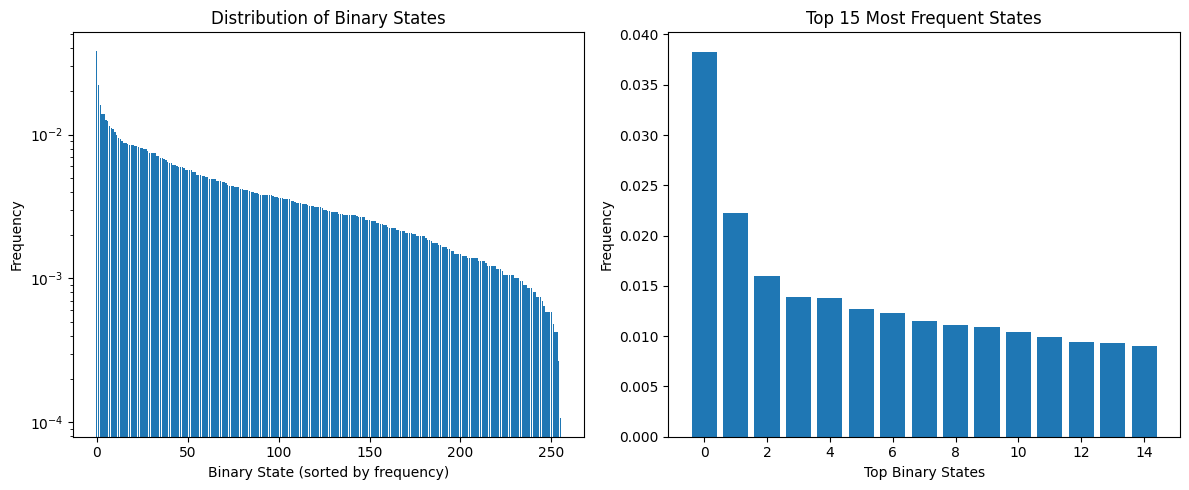

[((np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0)),
  0.03829787234042553),
 ((np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1)),
  0.022287234042553193),
 ((np.int32(0),
   np.int32(1),
   np.int32(1),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1)),
  0.015957446808510637),
 ((np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1),
   np.int32(1),
   np.int32(1),
   np.int32(0)),
  0.013936170212765957),
 ((np.int32(0),
   np.int32(1),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(0),
   np.int32(1)),
  0.013829787234042552),
 ((np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0),
   np.int32(0)),
  0.012712765957446808),
 ((np.int32(1),
   np.int32(0),
   np.int32(1),
   np.int32(0),
   np.int32(0

In [63]:
analyze_binary_frequencies(get_binary_latent_frequencies(my_model, val_loader), top_k=15)

In [1]:
import torch

In [32]:
a = torch.ones((2, 3), requires_grad=True)

In [33]:

w1 = torch.randn((2, 3), requires_grad=True)
w2 = torch.randn((2, 3), requires_grad=True)
w3 = torch.randn((2, 3), requires_grad=True)
w4 = torch.randn((2, 3), requires_grad=True)



In [39]:
w1.requires_grad = True

b = (w1 * a).detach()
c = w2 * a
d = b*w3 + c*w4


optimizer = torch.optim.Adam([a, w1, w2, w3, w4])
optimizer.zero_grad()

L = d.sum()
L.backward()


print(a.grad)

tensor([[-1.1830, -0.0679,  0.5495],
        [ 0.3463,  0.0700,  0.3287]])


In [ ]:
w1.requires_grad = False

b = w1 * a
c = w2 * a
d = b*w3 + c*w4


optimizer = torch.optim.Adam([a, w1, w2, w3, w4])
optimizer.zero_grad()

L = d.sum()
L.backward()


print(a.grad)

In [120]:
w1.requires_grad = True

b = (w1 * a).detach()
c = w2 * a
d = b*w3 + c*w4


optimizer = torch.optim.Adam([a, w1, w2, w3, w4])
optimizer.zero_grad()

L = d.sum()
L.backward()

print(a.grad)

tensor([[ 0.3063,  0.7799, -0.6527],
        [ 0.7012, -0.0188, -0.6859]])


In [4]:

l1 = torch.nn.Linear(8,4)
l2 = torch.nn.Linear(4,2)

# net = torch.nn.Sequential(
#     l1,
#     l2
# )


In [13]:
print(l1.weight)
print(l1.weight[0,1])
print(l1.weight[0,1].requires_grad)

Parameter containing:
tensor([[ 0.1839, -0.2874,  0.1669, -0.1476, -0.1792, -0.0948, -0.1116, -0.1928],
        [ 0.2935,  0.1523, -0.1539, -0.1568,  0.1730, -0.0159,  0.0629, -0.1093],
        [ 0.2190, -0.1254,  0.1951, -0.1168,  0.2324, -0.2288, -0.0837,  0.0243],
        [-0.2638,  0.0428, -0.0971, -0.3238,  0.1297,  0.2683, -0.0136,  0.1166]],
       requires_grad=True)
tensor(-0.2874, grad_fn=<SelectBackward0>)
True


In [18]:


# with torch.no_grad():
#     l1.weight.requires_grad =
print("l1.weight.is_leaf: ", l1.weight.is_leaf)
print("l1.weight[0].is_leaf: ", l1.weight[0].is_leaf)
print("l1.weight.data[0,1].is_leaf: ", l1.weight.data[0,1].is_leaf)
print("l1.weight[0,1]: ", l1.weight[0,1])
l1.weight.data[0,1].requires_grad = False


l1.weight.is_leaf:  True
l1.weight[0].is_leaf:  False
l1.weight.data[0,1].is_leaf:  True
l1.weight[0,1]:  tensor(-0.2874, grad_fn=<SelectBackward0>)


In [26]:
with torch.no_grad():
    l1.weight[0,1] = 0

In [20]:

l1.weight[0,1].is_leaf

False

In [4]:
# print(l1.weight[0,1])
l1.weight[0,1].requires_grad = True

RuntimeError: you can only change requires_grad flags of leaf variables.

In [9]:
l1.weight.requires_grad = False
l1.weight.is_leaf

True

In [215]:
l1.weight[0,:].requires_grad = True

In [172]:
l1.weight[1,1].requires_grad

False

In [ ]:
class ProgressiveAE(nn.Module):
    def __init__(
            self,
            input_dim,
            latent_dim,
            device,
            num_hidden_layers = 1,
            decrease_rate = 0.5,
            activation_fn = nn.ReLU,
            bottleneck_in_fn = nn.Sigmoid
        ):
        
        super.__init__()

        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.num_hidden_layers = num_hidden_layers
        self.device = device
        self.activation_fn = activation_fn
        self.bottleneck_in_fn = bottleneck_in_fn


        # --------------Encoder----------------

        encoder_layers_sizes = [input_dim]
        for i in range(num_hidden_layers):
            encoder_layers_sizes.append(int(encoder_layers_sizes[-1] * decrease_rate))

        encoder_layers = []                             # creates the encoder without the bottleneck
        for i in range(len(encoder_layers_sizes) - 1):
            encoder_layers.append(
                nn.Linear(encoder_layers_sizes[i], encoder_layers_sizes[i + 1])
                )
            encoder_layers.append(
                activation_fn()
                )
        self.amputated_encoder = nn.Sequential(*encoder_layers).to(device)


        # --------------Decoder----------------

        decoder_layers_sizes = list(reversed(encoder_layers_sizes))

        decoder_layers = []                             # creates the decoder without the bottleneck
        for i in range(len(decoder_layers_sizes) - 1):
            decoder_layers.append(
                nn.Linear(decoder_layers_sizes[i], decoder_layers_sizes[i + 1])
                )
            decoder_layers.append(
                activation_fn()
                )
        self.amputated_decoder = nn.Sequential(*decoder_layers).to(device)


        # --------------Bottleneck----------------

        self.bottleneck_in_dict = nn.ModuleDict(
            {f"n{i+1}": nn.Linear(encoder_layers_sizes[-1], 1).to(device) for i in range(latent_dim)}
        )

        self.bottleneck_out_dict = nn.ModuleDict(
            {f"n{i+1}": nn.Linear(1, decoder_layers_sizes[0]).to(device) for i in range(latent_dim)}
        )


    def encode(self, x):
        semi_encoded_x = self.amputated_encoder(x)
        encoded_x = torch.cat(                                                                                  # .cat to collect the single neurons tensors into only one tensor.
            [self.bottleneck_in_fn( linear(semi_encoded_x) ) for linear in self.bottleneck_in_dict.values()],      # Applies the bottleneck activation function to each linear layer's output.                              
            dim=-1
        )
    

    def decode(self, x)):
        


SyntaxError: expected ':' (2668322555.py, line 10)

In [21]:
my_dict = {}
for i in range(5):
    my_dict[f"var_{i+1}"] = i

In [2]:
import torch

In [17]:
my_vect = torch.rand((5, 6), requires_grad=True)


In [18]:
print(my_vect)

tensor([[0.4804, 0.8714, 0.7773, 0.0424, 0.2739, 0.6405],
        [0.3801, 0.7623, 0.1396, 0.3274, 0.2377, 0.5924],
        [0.0766, 0.5707, 0.4989, 0.4114, 0.0491, 0.2126],
        [0.3109, 0.4813, 0.9972, 0.5222, 0.5321, 0.0432],
        [0.1757, 0.6072, 0.0769, 0.3719, 0.5335, 0.4842]], requires_grad=True)


In [19]:
n = torch.nn.Linear(6,3)

In [21]:
n(my_vect)

tensor([[ 0.2791, -0.4206, -0.2891],
        [ 0.3040, -0.5833, -0.3038],
        [ 0.2857, -0.2291, -0.4149],
        [ 0.2163,  0.0475, -0.4027],
        [ 0.2799, -0.5173, -0.3913]], grad_fn=<AddmmBackward0>)

In [31]:
x1 = torch.randn(10, 1)
x2 = torch.randn(10, 1)
x = []
x.append(x1)
x.append(x2)
print(x1)
print(x2)

x3 = torch.cat(x, dim=-1)
print('\n------------------------')
print(x3)

tensor([[-0.7905],
        [-0.9058],
        [-0.2607],
        [-0.5465],
        [ 2.1174],
        [-1.7118],
        [ 0.1651],
        [ 1.5819],
        [ 0.4485],
        [ 0.0330]])
tensor([[ 1.4503],
        [-0.6936],
        [ 0.9967],
        [ 0.6131],
        [ 0.7764],
        [-0.3029],
        [-1.2753],
        [-0.4758],
        [ 2.3839],
        [ 0.9157]])

------------------------
tensor([[-0.7905,  1.4503],
        [-0.9058, -0.6936],
        [-0.2607,  0.9967],
        [-0.5465,  0.6131],
        [ 2.1174,  0.7764],
        [-1.7118, -0.3029],
        [ 0.1651, -1.2753],
        [ 1.5819, -0.4758],
        [ 0.4485,  2.3839],
        [ 0.0330,  0.9157]])


In [41]:
input_data = torch.randn(3)
print(input_data)

tensor([1.6640, 0.0110, 0.1447])


In [ ]:
input_data_unbind = list(torch.unbind(input_data, dim=0))  # Split along the first dimension
print(input_data_unbind) 


[tensor(1.6640), tensor(0.0110), tensor(0.1447)]


In [ ]:
mask = 


In [53]:
my_tuple[0] = 33

TypeError: 'tuple' object does not support item assignment

In [1]:
import torch

In [5]:
a = torch.tensor(2., requires_grad=True)
b = torch.tensor((a**2, a/2), requires_grad=True)
print(b.requires_grad)
c = list(torch.unbind(b, dim=0))
print(c[0].is_leaf)
print(c[0].requires_grad)
print(c)
c[1].detach()

print("c[1].requires_grad:", c[1].requires_grad)
c = torch.tensor(c, requires_grad=True)
loss = c.sum()

print(loss)

loss.backward()
print(a.grad)
print(b.grad)
print(c.grad)


True
False
True
[tensor(4., grad_fn=<UnbindBackward0>), tensor(1., grad_fn=<UnbindBackward0>)]
c[1].requires_grad: True
tensor(5., grad_fn=<SumBackward0>)
None
None
tensor([1., 1.])


In [25]:
a = torch.tensor(2., requires_grad=True)
b = torch.stack([a**2, a/2])
print(b.requires_grad)
c = list(torch.unbind(b, dim=0))
print(c[0].is_leaf)
print(c[0].requires_grad)
print(c)
#c[0] = c[0].detach()
c[1] = c[1].detach() 

c = torch.stack(c)  # Use stack, not tensor()
loss = c.sum()
print("loss:", loss)

loss.backward()
print("a.grad", a.grad)
print(b.grad)
print(c.grad)

True
False
True
[tensor(4., grad_fn=<UnbindBackward0>), tensor(1., grad_fn=<UnbindBackward0>)]
loss: tensor(5., grad_fn=<SumBackward0>)
a.grad tensor(4.)
None
None


/var/folders/bb/kqb36gjx6c51yhmhfvh767rr0000gn/T/ipykernel_6223/2839569559.py:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(b.grad)
/var/folders/bb/kqb36gjx6c51yhmhfvh767rr0000gn/T/ipykernel_6223/2839569559.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If 

In [29]:
a = torch.tensor((2., 3.), requires_grad=True)
b = torch.stack([a**2, a/2])
c = list(torch.unbind(b, dim=0))

c[0] = c[0].detach() 


c = torch.stack(c)
loss = c.sum()

loss.backward()
print("a.grad", a.grad)

a.grad tensor([0.5000, 0.5000])


In [15]:
import torch 
a = torch.ones(5)
a.requires_grad = True

b = 2*a

b.retain_grad()   # Since b is non-leaf and it's grad will be destroyed otherwise.

c = b.mean()

c.backward()

print("a.grad: ", a.grad)
print("b.grad: ", b.grad)

# Redo the experiment but with a hook that multiplies b's grad by 2. 
a = torch.ones(5)

a.requires_grad = True

b = 2*a

b.retain_grad()

b.register_hook(lambda grad: print("This prints grad", grad))  

b.mean().backward() 


print("a.grad: ", a.grad)
print("b.grad: ", b.grad)



a = torch.ones(5)

a.requires_grad = True
b = 2*a

b.retain_grad()


b.mean().backward() 

print("Before multiplying")
print("a.grad: ", a.grad)
print("b.grad: ", b.grad)

b.grad *= 2
print("After multiplying")
print("a.grad: ", a.grad)
print("b.grad: ", b.grad)       # a's gradient needs to updated manually

a.grad:  tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000])
b.grad:  tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
This prints grad tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
a.grad:  tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000])
b.grad:  tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
Before multiplying
a.grad:  tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000])
b.grad:  tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
After multiplying
a.grad:  tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000])
b.grad:  tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000])


In [32]:
a = torch.ones(5)

a.requires_grad = True
b = 2*a

b.retain_grad()


b.mean().backward() 


print(a.grad, b.grad)

b.grad *= 2

print(a.grad, b.grad)       # a's gradient needs to updated manually

tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000]) tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000]) tensor([0.4000, 0.4000, 0.4000, 0.4000, 0.4000])


In [92]:
a = torch.randn(2,3,3)
print("original a", a)
print("modif a", a.view(-1, 9))

original a tensor([[[-0.4466,  1.4673,  1.4671],
         [-0.1889, -0.6900,  0.2157],
         [ 0.7927, -1.7409, -1.8248]],

        [[-1.0475, -0.0026, -0.4129],
         [ 0.9191,  1.8087, -0.2617],
         [-0.6557,  1.0314, -1.2188]]])
modif a tensor([[-0.4466,  1.4673,  1.4671, -0.1889, -0.6900,  0.2157,  0.7927, -1.7409,
         -1.8248],
        [-1.0475, -0.0026, -0.4129,  0.9191,  1.8087, -0.2617, -0.6557,  1.0314,
         -1.2188]])


# Mask with Hooks

In [1]:
import torch
import torch.nn as nn

In [ ]:
class ProgressiveAE(nn.Module):
    def __init__(
            self,
            input_dim,
            latent_dim,
            device,
            num_hidden_layers = 1,
            decrease_rate = 0.5,
            activation_fn = nn.ReLU,
            bottleneck_in_fn = nn.Sigmoid,
            output_decoder_activ_func = None
        ):
        
        super.__init__()

        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.num_hidden_layers = num_hidden_layers
        self.device = device
        self.activation_fn = activation_fn
        self.bottleneck_in_fn = bottleneck_in_fn


        # --------------Encoder----------------

        encoder_layers_sizes = [input_dim]
        for i in range(num_hidden_layers):
            encoder_layers_sizes.append(int(encoder_layers_sizes[-1] * decrease_rate))

        encoder_layers = []                             # creates the encoder without the bottleneck
        for i in range(len(encoder_layers_sizes) - 1):
            encoder_layers.append(
                nn.Linear(encoder_layers_sizes[i], encoder_layers_sizes[i + 1])
                )
            encoder_layers.append(
                activation_fn()
                )
        self.amputated_encoder = nn.Sequential(*encoder_layers).to(device)


        # --------------Decoder----------------

        decoder_layers_sizes = list(reversed(encoder_layers_sizes))

        decoder_layers = []                             # creates the decoder without the bottleneck
        for i in range(len(decoder_layers_sizes) - 1):
            decoder_layers.append(
                nn.Linear(decoder_layers_sizes[i], decoder_layers_sizes[i + 1])
                )
            if i < len(decoder_layers_sizes) - 2:
                decoder_layers.append(
                    activation_fn()
                    )
            elif output_decoder_activ_func is not None:
                decoder_layers.append(output_decoder_activ_func)
        self.amputated_decoder = nn.Sequential(*decoder_layers).to(device)


        # --------------Bottleneck----------------

        self.bottleneck_in = nn.Sequential(nn.Linear(encoder_layers_sizes[-1], latent_dim), bottleneck_in_fn)
        self.bottleneck_out = nn.Sequential(nn.Linear(latent_dim, decoder_layers_sizes[0]), activation_fn)


    # ----------------Encode, decode and Forward-------------------

    def encode(self, x):
        return self.bottleneck_in(self.amputated_encoder(x))


    def decode(self, x):
        return self.amputated_decoder(self.bottleneck_out(x))

    
    def forward(self, x):
        return self.decode(self.encode(x))



In [88]:
def mask_bottleneck_in_weight(weight, neuron_idx):      # neurons 1-indexed
    with torch.no_grad():
        active_neurons = list(range(neuron_idx))
        train_neuron = active_neurons[-1]
        mask_mul = torch.zeros_like(weight)
        mask_add = torch.zeros_like(weight)
        mask_mul[active_neurons, :] = 1                 # weights have shape (latent_dim, encoder[-1])
        mask_add[train_neuron, :] = torch.randn((1, weight.size(1)))
        return weight * mask_mul + mask_add
    
def mask_bottleneck_in_bias(bias, neuron_idx):      # neurons 1-indexed
    with torch.no_grad():
        active_neurons = list(range(neuron_idx))
        train_neuron = active_neurons[-1]
        mask_mul = torch.zeros_like(bias)
        mask_add = torch.zeros_like(bias)
        mask_mul[active_neurons] = 1
        mask_add[train_neuron] = torch.randn(1)
        return bias * mask_mul + mask_add
    
def mask_bottleneck_out_weight(weight, neuron_idx):      # neurons 1-indexed
    with torch.no_grad():
        active_neurons = list(range(neuron_idx))
        train_neuron = active_neurons[-1]
        mask_mul = torch.zeros_like(weight)
        mask_add = torch.zeros_like(weight)
        mask_mul[:, active_neurons] = 1                 # weights have shape (latent_dim, encoder[-1])
        mask_add[:, train_neuron] = torch.randn((weight.size(0),))
        return weight * mask_mul + mask_add
    
def mask_bottleneck_out_bias(bias, neuron_idx):      # neurons 1-indexed
    with torch.no_grad():
        active_neurons = list(range(neuron_idx))
        train_neuron = active_neurons[-1]
        mask_mul = torch.zeros_like(bias)
        mask_add = torch.zeros_like(bias)
        mask_mul[active_neurons] = 1
        mask_add[train_neuron] = torch.randn(1)
        return bias * mask_mul + mask_add




def mask_bottleneck_in_weight_grad(grad, neuron_idx, freeze_previous_neurons_train=True):      # neurons 1-indexed
    if freeze_previous_neurons_train:
        mask = torch.zeros_like(grad)
        mask[neuron_idx-1, :] = 1                   # weights have shape (latent_dim, encoder[-1])
    else:
        active_neurons = list(range(neuron_idx))
        mask = torch.zeros_like(grad)
        mask[active_neurons, :] = 1                 
    return grad * mask


def mask_bottleneck_in_bias_grad(grad, neuron_idx, freeze_previous_neurons_train=True):     #neurons 1-indexed
    if freeze_previous_neurons_train:
        mask = torch.zeros_like(grad)
        mask[neuron_idx-1] = 1
    else:
        active_neurons = list(range(neuron_idx))
        mask[active_neurons] = 1
    return grad * mask


def mask_bottleneck_out_weight_grad(grad, neuron_idx, freeze_previous_neurons_train=True):      # neurons 1-indexed
    if freeze_previous_neurons_train:
        mask = torch.zeros_like(grad)
        mask[:, neuron_idx-1] = 1                   # weights have shape (latent_dim, encoder[-1])
    else:
        active_neurons = list(range(neuron_idx))
        mask = torch.zeros_like(grad)
        mask[:, active_neurons] = 1
    return grad * mask


def mask_bottleneck_out_bias_grad(grad, neuron_idx, freeze_previous_neurons_train=True):     #neurons 1-indexed
    if freeze_previous_neurons_train:
        mask = torch.zeros_like(grad)
        mask[neuron_idx-1] = 1
    else:
        active_neurons = list(range(neuron_idx))
        mask[active_neurons] = 1
    return grad * mask



#handle = model.bottleneck_in[0].weight.register_hook(lambda grad: mask_bottleneck(grad, i_th_neuron))

In [ ]:
def train_single_neruon(model,
                        epochs, 
                        neuron_to_train, # 1-indexed
                        train_loader, 
                        val_loader,
                        writer,
                        lr = 1e-3,
                        scheduler = None,
                        freeze_previous_neurons_train = True,
                        optimizer_func = torch.optim.Adam, 
                        save_tensorboard_parameters = False,
                        save_tensorboard_bottleneck_parameters = False,
                        ):
    
    print(f"\n ------------ Training of neuron{neuron_to_train}---------------")

    # ----------------------------- Optimizer initialization -----------------------------

    optimizer = optimizer_func(model.parameters, lr=lr, weight_decay=1e-5)

    # ----------------------------- Mask parameters and register hook -----------------------------------

    with torch.no_grad():
        model.bottleneck_in[0].weight.copy_(
            mask_bottleneck_in_weight(model.bottleneck_in[0].weight),
            neuron_to_train,
            )
        model.bottleneck_in[0].bias.copy(
            mask_bottleneck_in_bias(model.bottleneck_in[0],
            neuron_to_train)
        )
        model.bottleneck_out[0].weight.copy_(
            mask_bottleneck_out_weight(model.bottleneck_in[0].weight),
            neuron_to_train,
            )
        model.bottleneck_out[0].bias.copy(
            mask_bottleneck_out_bias(model.bottleneck_in[0],
            neuron_to_train)
        )


    handle_weight_in = model.bottleneck_in[0].weight.register_hook(lambda grad: mask_bottleneck_in_weight_grad(grad, neuron_to_train, freeze_previous_neurons_train))
    handle_bias_in = model.bottleneck_in[0].bias.register_hook(lambda grad: mask_bottleneck_in_bias_grad(grad, neuron_to_train, freeze_previous_neurons_train))
    handle_weight_out = model.bottleneck_out[0].weight.register_hook(lambda grad: mask_bottleneck_out_weight_grad(grad, neuron_to_train, freeze_previous_neurons_train))
    handle_bias_out = model.bottleneck_out[0].bias.register_hook(lambda grad: mask_bottleneck_out_bias_grad(grad, neuron_to_train, freeze_previous_neurons_train))


    #-------------------------- Main loops --------------------------

    global_batch_idx = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        # --------------------------- Weight optimization loop --------------------

        for data, _ in train_loader:
            data = data.to(model.device)    
            optimizer.zero_grad()
            output = model(data)
            loss = nn.MSELoss()(output, data)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            global_batch_idx += 1

        if scheduler is not None:
            scheduler.step()


        # -------------------------- Writer register scalars and parameters --------------------------

        writer.add_scalar(
            "Loss/train", train_loss / len(train_loader.dataset), global_step=(epoch + epochs * neuron_to_train) #to keep trace of the total number of epochs
        )

        print(
            "Epoch: {}/{}, Average loss: {:.4f}".format(
                epoch, epochs, train_loss / len(train_loader.dataset)
            )
        )

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data, _ in val_loader:
                data = data.to(model.device)
                output = model(data)
                loss = nn.MSELoss()(output, data)
                val_loss += loss.item()

        writer.add_scalar(
            "Loss/val", val_loss / len(val_loader.dataset), global_step=(epoch + epochs*neuron_to_train)
        )

        if save_tensorboard_bottleneck_parameters:
            for name, param in model.bottleneck_in.named_parameters():
                writer.add_histogram(name, param, global_step=(epoch + epochs*neuron_to_train))
                writer.add_histogram(f"{name}.grad", param.grad, global_step=(epoch + epochs*neuron_to_train))
            for name, param in model.bottleneck_out.named_parameters():
                writer.add_histogram(name, param, global_step=(epoch + epochs*neuron_to_train))
                writer.add_histogram(f"{name}.grad", param.grad, global_step=(epoch + epochs*neuron_to_train))


        if save_tensorboard_parameters:
            for name, param in model.named_parameters():
                writer.add_histogram(name, param, global_step=epoch)
                writer.add_histogram(f"{name}.grad", param.grad, global_step=epoch)

    writer.close()

    # ------------------------ Remove hook and zero_grads ----------------------------

    handle_weight_in.remove()
    handle_bias_in.remove()
    handle_weight_out.remove()
    handle_bias_out.remove()

    optimizer.zero_grad()


    print(
        f"Training of neuron {neuron_to_train} completed. Final training loss: {train_loss / len(train_loader.dataset)}, Validation loss: {val_loss / len(val_loader.dataset)}"
    )

    return 0






SyntaxError: invalid syntax. Perhaps you forgot a comma? (2269563368.py, line 9)

In [9]:
784 * 0.6

470.4

In [5]:
torch.nn.Linear(8,4).weight

Parameter containing:
tensor([[-0.2406, -0.1101, -0.1442, -0.2865, -0.1795,  0.1862,  0.0311, -0.1614],
        [-0.1142, -0.3058, -0.1900,  0.1145,  0.2635, -0.2777,  0.2904,  0.3423],
        [-0.2553,  0.2700,  0.2232,  0.3136,  0.0847,  0.0129,  0.3514, -0.2732],
        [-0.1779, -0.3012, -0.1169, -0.2992, -0.2825, -0.0326,  0.2929, -0.0684]],
       requires_grad=True)

## Test functions

In [64]:
linear = torch.nn.Linear(4,8)

print("------------------TRAINING N.1----------------------")
print("-----------------------Before training------------------------")
print("linear weights:", linear.weight)
print("linear_bias", linear.bias)

print("\n ---------------------After masking-----------------------")
with torch.no_grad():
    linear.weight.copy_(mask_bottleneck_out_weight(linear.weight, 1))
    linear.bias.copy_(mask_bottleneck_in_bias(linear.bias, 1))


print(linear.weight)
print(linear.bias)

handle = linear.weight.register_hook(lambda grad: mask_bottleneck_out_weight_grad(grad, 1))
handle_bias = linear.bias.register_hook(lambda grad: mask_bottleneck_out_bias_grad(grad, 1))

------------------TRAINING N.1----------------------
-----------------------Before training------------------------
linear weights: Parameter containing:
tensor([[ 0.1583, -0.4698,  0.2429,  0.0485],
        [-0.4801,  0.4939,  0.4996, -0.0552],
        [-0.1223, -0.1967,  0.1190, -0.3731],
        [ 0.2674, -0.0664, -0.4295,  0.4457],
        [ 0.3615, -0.1372, -0.2546, -0.0474],
        [ 0.3163,  0.1145, -0.2043,  0.2018],
        [-0.3837,  0.0837, -0.2856, -0.4784],
        [-0.1346, -0.1053,  0.0158, -0.0046]], requires_grad=True)
linear_bias Parameter containing:
tensor([ 0.2929,  0.3968,  0.1428, -0.2952, -0.2075, -0.0737, -0.1421,  0.3178],
       requires_grad=True)

 ---------------------After masking-----------------------
Parameter containing:
tensor([[-0.2341,  0.0000,  0.0000,  0.0000],
        [-1.0264,  0.0000,  0.0000,  0.0000],
        [ 0.2044,  0.0000,  0.0000,  0.0000],
        [ 0.5746,  0.0000,  0.0000,  0.0000],
        [ 0.0752,  0.0000,  0.0000,  0.0000],
   

In [66]:
fake_data = torch.randn(4)
print(fake_data)


tensor([ 0.9249,  0.7262,  0.1996, -0.5617])


In [67]:
optimizer_func = torch.optim.Adam
optimizer = optimizer_func(linear.parameters(), lr=1)

b = linear(fake_data) ** 2
loss = b.sum()
loss.backward()
optimizer.step()
optimizer.zero_grad()
print("WEIGHT GRAD =", linear.weight.grad)
handle.remove()
handle_bias.remove()
print("\n ---------------------After training-----------------------")
print(linear.weight)
print(linear.bias)

WEIGHT GRAD = None

 ---------------------After training-----------------------
Parameter containing:
tensor([[-1.2341,  0.0000,  0.0000,  0.0000],
        [-0.0264,  0.0000,  0.0000,  0.0000],
        [-0.7956,  0.0000,  0.0000,  0.0000],
        [-0.4254,  0.0000,  0.0000,  0.0000],
        [-0.9248,  0.0000,  0.0000,  0.0000],
        [-0.6744,  0.0000,  0.0000,  0.0000],
        [ 0.7767,  0.0000,  0.0000,  0.0000],
        [-0.0393,  0.0000,  0.0000,  0.0000]], requires_grad=True)
Parameter containing:
tensor([-0.0277,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       requires_grad=True)


In [68]:
print("\n--------------------TRAINING N.2---------------------")

print("\n ---------------------After masking-----------------------")
with torch.no_grad():
    linear.weight.copy_(mask_bottleneck_out_weight(linear.weight, 3))
    linear.bias.copy_(mask_bottleneck_out_bias(linear.bias, 3))

optimizer = torch.optim.Adam(linear.parameters(), lr=1)



--------------------TRAINING N.2---------------------

 ---------------------After masking-----------------------


In [69]:

print(linear.weight)
print(linear.bias)

handle = linear.weight.register_hook(lambda grad: mask_bottleneck_out_weight_grad(grad, 3))
handle_bias = linear.bias.register_hook(lambda grad: mask_bottleneck_out_bias_grad(grad, 3))



Parameter containing:
tensor([[-1.2341,  0.0000, -0.3466,  0.0000],
        [-0.0264,  0.0000,  1.9828,  0.0000],
        [-0.7956,  0.0000, -1.1989,  0.0000],
        [-0.4254,  0.0000,  0.5044,  0.0000],
        [-0.9248,  0.0000,  0.5415,  0.0000],
        [-0.6744,  0.0000, -0.5585,  0.0000],
        [ 0.7767,  0.0000,  0.5276,  0.0000],
        [-0.0393,  0.0000,  1.1779,  0.0000]], requires_grad=True)
Parameter containing:
tensor([-0.0277,  0.0000,  0.2479,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       requires_grad=True)


In [87]:


print("\n ---------------------After training-----------------------")
optimizer.zero_grad()
b = linear(fake_data) ** 2
loss = b.sum()
loss.backward()
print("WEIGHT GRAD",linear.weight.grad)
optimizer.step()

print(linear.weight)
print(linear.bias)



 ---------------------After training-----------------------
WEIGHT GRAD tensor([[ 0.0000,  0.0000,  0.1221, -0.0000],
        [-0.0000, -0.0000, -0.0154,  0.0000],
        [-0.0000, -0.0000, -0.0237,  0.0000],
        [ 0.0000,  0.0000,  0.0354, -0.0000],
        [-0.0000, -0.0000, -0.0562,  0.0000],
        [-0.0000, -0.0000, -0.0590,  0.0000],
        [ 0.0000,  0.0000,  0.0333, -0.0000],
        [ 0.0000,  0.0000,  0.0058, -0.0000]])
Parameter containing:
tensor([[-1.2341,  0.0000,  7.0656,  0.0000],
        [-0.0264,  0.0000, -0.2416,  0.0000],
        [-0.7956,  0.0000, -0.5078,  0.0000],
        [-0.4254,  0.0000,  2.3711,  0.0000],
        [-0.9248,  0.0000,  3.4160,  0.0000],
        [-0.6744,  0.0000,  2.2361,  0.0000],
        [ 0.7767,  0.0000, -2.9272,  0.0000],
        [-0.0393,  0.0000,  0.3942,  0.0000]], requires_grad=True)
Parameter containing:
tensor([-0.0277,  0.0000,  0.9389,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
       requires_grad=True)


In [ ]:

handle.remove()
handle_bias.remove()






In [ ]:
with torch.no_grad():
    bottleneck[0].weight.copy_(mask_bottleneck_weight(bottleneck[0].weight, 1))
print(bottleneck[0].weight)

[0]
0


In [81]:
with torch.no_grad():
    bottleneck[0].bias.copy_(mask_bottleneck_in_bias(bottleneck[0].bias, 1))
print(bottleneck[0].bias)

Parameter containing:
tensor([0.2865, 0.0000, 0.0000, 0.0000], requires_grad=True)


In [82]:
with torch.no_grad():
    bottleneck[0].bias.copy_(mask_bottleneck_in_bias(bottleneck[0].bias, 2))
print(bottleneck[0].bias)

Parameter containing:
tensor([0.2865, 0.5435, 0.0000, 0.0000], requires_grad=True)


In [79]:
with torch.no_grad():
    bottleneck[0].weight.copy_(mask_bottleneck_weight(bottleneck[0].weight, 2))

print(bottleneck[0].weight)

[0, 1]
1
Parameter containing:
tensor([[ 0.3302, -0.0120,  0.0296,  0.0739,  0.0459,  0.1319, -0.0863,  0.0363],
        [ 0.5851,  0.6393, -1.0494, -1.4463, -1.0969,  2.1376,  0.1661,  0.0495],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       requires_grad=True)


# Emp_states_dict not binarized

In [7]:
latent_dim = 8
decrease_rate = 0.6
decrease_rate_str = "06"
dataset = "MNIST"
num_hidden_layers = 3
input_dim = 784


my_model = AE_0(
    input_dim=input_dim,
    latent_dim=latent_dim,
    decrease_rate=decrease_rate,
    device=device,
    hidden_layers=num_hidden_layers
).to(device)
model_path = '/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/prova/MNIST/ld8_dr06_lr1e3_30ep_3hl.pth'
# model_path = f"/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/simultaneous train/{dataset}/ld{latent_dim}_dr{decrease_rate_str}_lr1e3_lwpretrain_{num_hidden_layers}hl.pth"
my_model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [8]:
num_samples = 10

data_loader = val_loader_MNIST

images, labels = next(iter(data_loader))

images = images.to(device)

# Select random indices to visualize
indices = torch.randint(0, images.size(0), (num_samples,))

latent = []
for i, idx in enumerate(indices):
    img = images[idx].unsqueeze(0)
    # Flatten and encode
    with torch.no_grad():
        latent.append(my_model.encode(img.view(1, -1)))


print(latent)

[tensor([[0.0547, 0.8851, 0.7088, 0.2870, 0.2315, 0.6479, 0.5466, 0.4587]]), tensor([[0.7664, 0.3190, 0.5705, 0.3122, 0.7257, 0.7429, 0.8473, 0.3340]]), tensor([[0.3805, 0.5761, 0.3209, 0.4664, 0.0909, 0.7202, 0.9166, 0.7392]]), tensor([[0.1248, 0.8996, 0.2979, 0.1314, 0.8051, 0.3309, 0.6412, 0.6099]]), tensor([[0.1567, 0.8868, 0.7168, 0.4512, 0.3011, 0.5634, 0.5527, 0.6897]]), tensor([[0.3776, 0.5318, 0.7566, 0.1240, 0.4581, 0.4045, 0.5027, 0.9324]]), tensor([[0.4063, 0.3022, 0.7355, 0.9099, 0.6408, 0.8170, 0.2192, 0.1803]]), tensor([[0.1859, 0.6834, 0.5455, 0.2101, 0.6520, 0.2765, 0.4924, 0.6479]]), tensor([[0.2185, 0.8017, 0.1934, 0.8058, 0.1726, 0.8729, 0.1680, 0.5847]]), tensor([[0.3785, 0.6490, 0.6850, 0.1682, 0.4863, 0.3459, 0.5186, 0.9153]])]


In [54]:
latent_dim = 8
decrease_rate = 0.6
dataset = "MNIST"
num_hidden_layers = 5
input_dim = 784


my_model = AE_0(
    input_dim=input_dim,
    latent_dim=latent_dim,
    decrease_rate=decrease_rate,
    device=device,
    hidden_layers=num_hidden_layers,
    output_activation_encoder=nn.ReLU
).to(device)
model_path = f"/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/relu_output/simultaneous train/{dataset}/ld{latent_dim}_lr1e-3_dr{decrease_rate}_{num_hidden_layers}hl.pth"
my_model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [55]:
num_samples = 10

data_loader = val_loader_MNIST

images, labels = next(iter(data_loader))

images = images.to(device)

# Select random indices to visualize
indices = torch.randint(0, images.size(0), (num_samples,))

latent = []
for i, idx in enumerate(indices):
    img = images[idx].unsqueeze(0)
    # Flatten and encode
    with torch.no_grad():
        latent.append(my_model.encode(img.view(1, -1)))


print(latent)

[tensor([[5.0971, 1.5529, 0.0000, 2.5322, 0.4985, 1.6270, 3.3599, 0.0000]]), tensor([[4.1834, 4.5390, 0.0000, 3.8908, 0.7799, 7.7804, 1.4963, 0.0000]]), tensor([[ 4.8467,  6.1197,  0.0000, 13.2106,  1.2700,  6.5020,  6.4476,  0.0000]]), tensor([[5.3718, 4.1672, 0.0000, 4.2626, 0.9603, 7.1562, 7.6085, 0.0000]]), tensor([[ 8.3916,  6.0611,  0.0000,  3.9146,  1.3395, 10.7969,  9.9270,  0.0000]]), tensor([[5.7260, 3.5400, 0.0000, 1.8647, 0.5600, 3.5516, 0.8872, 0.0000]]), tensor([[7.2303, 5.9940, 0.0000, 4.0863, 1.1255, 8.9473, 6.8789, 0.0000]]), tensor([[5.0937, 0.8461, 0.0000, 6.1747, 0.7487, 4.0879, 5.2206, 0.0000]]), tensor([[5.7772, 5.8247, 0.0000, 5.4352, 1.1588, 9.1460, 8.3670, 0.0000]]), tensor([[0.8379, 7.9885, 0.0000, 9.7196, 1.0375, 5.5952, 4.7456, 0.0000]])]


In [22]:
import sys
sys.path.append('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders')
from AE.utils import compute_emp_states_dict

In [31]:
from AE.depth_utils import calc_optimal_g, compute_emp_states_dict_gauged

In [38]:
emp_states_dict_gauged = compute_emp_states_dict_gauged(my_model,data_loader,binarize_threshold=2)

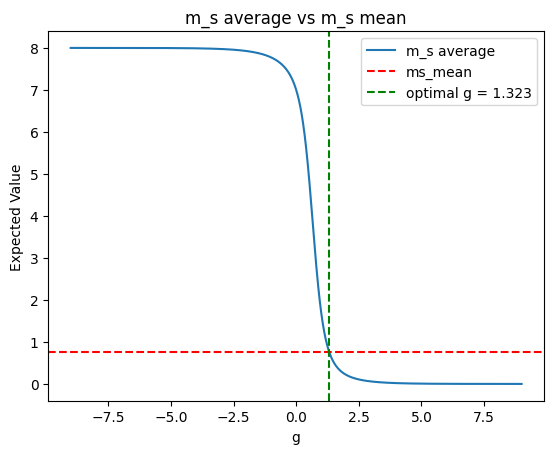

np.float64(1.3234411470490155)

In [39]:
calc_optimal_g(emp_states_dict_gauged, plot_graph=True)

# Set bias

In [2]:
net = nn.Sequential(nn.Linear(16, 8), nn.Linear(8,4))

In [5]:
print(net.bias)

AttributeError: 'Sequential' object has no attribute 'bias'

In [13]:
with torch.no_grad():
    for i in range((len(net))):
        if isinstance(net[i], nn.Linear):
            net[i].bias.fill_(1)

In [14]:
print(net[1].bias)

Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)


# Optimize threshold

In [ ]:


def compute_dataset_klds_gs_dict_with_optimal_threshold_(dataset, data_loader, model_kwargs, model_path_kwargs, binarize_threshold_range, num_hidden_layers_range, dataset_klds_dict = None, dataset_gs_dict = None, verbose=True):

    
    if dataset_klds_dict is None:
        dataset_klds_dict = {
            '2MNIST': [],
            'MNIST': [],
            'EMNIST': []}
    if dataset_gs_dict is None:
        dataset_gs_dict = {
            '2MNIST': [],
            'MNIST': [],
            'EMNIST': []}


    dataset_klds_dict[dataset] = []
    dataset_gs_dict[dataset] = []


    memoize_klds_dict = {}
    memoize_gs_dict = {}


    klds_sign_changes_lst, gs_distances_lst = compute_energy_addends_lst(
        binarize_threshold_range=binarize_threshold_range, 
        dataset=dataset, 
        data_loader=data_loader, 
        model_kwargs=model_kwargs, 
        model_path_kwargs=model_path_kwargs, 
        num_hidden_layers_range=num_hidden_layers_range, 
        memoize_klds_dict=memoize_klds_dict, 
        memoize_gs_dict=memoize_gs_dict
    )

    
    best_binarize_thresold, best_energy = optimize_binarize_threshold(
        klds_sign_changes_lst, 
        gs_distances_lst, 
        binarize_threshold_range
    )

    dataset_klds_dict[dataset] = memoize_klds_dict[str(best_binarize_thresold)]
    dataset_gs_dict[dataset] = memoize_gs_dict[str(best_binarize_thresold)]

    if verbose:
        print(f"best_binarize_thresold: ", best_binarize_thresold)
        print(f"best_energy: ", best_energy)

    return dataset_klds_dict, dataset_gs_dict


def optimize_binarize_threshold(klds_sign_changes_lst, gs_distances_lst, binarize_threshold_range):
    best_energy = float('inf')
    best_binarize_thresold = None

    for i, binarize_threshold in enumerate(binarize_threshold_range):
        energy = (
            10 * klds_sign_changes_lst[i] 
            + 1 * gs_distances_lst[i]
        )
        if energy < best_energy:
            best_energy = energy
            best_binarize_thresold = binarize_threshold

    return best_binarize_thresold, best_energy



def compute_energy_addends_lst(binarize_threshold_range, dataset, data_loader, model_kwargs, model_path_kwargs, num_hidden_layers_range, memoize_klds_dict, memoize_gs_dict):

    klds_sign_changes_lst = []
    gs_distances_lst = []

    for binarize_threshold in binarize_threshold_range:

        klds_lst, gs_lst = compute_klds_gs_lst_with_fixed_threshold(dataset, data_loader, model_kwargs, model_path_kwargs, binarize_threshold, num_hidden_layers_range, memoize_klds_dict, memoize_gs_dict)

        klds_sign_changes_lst.append( count_sign_changes(klds_lst) )
        gs_distances_lst.append( sum(abs(a - np.log(2)) for a in gs_lst) )

    klds_sign_changes_lst = np.array(klds_sign_changes_lst) / max(klds_sign_changes_lst)
    gs_distances_lst = np.array(gs_distances_lst) / max(gs_distances_lst)

    return klds_sign_changes_lst, gs_distances_lst




def compute_klds_gs_lst_with_fixed_threshold(dataset, data_loader, model_kwargs, model_path_kwargs, binarize_threshold, num_hidden_layers_range, memoize_klds_dict, memoize_gs_dict):

    from AE.depth_utils import calc_hfm_kld_with_optimal_g

    klds_lst = []
    gs_lst = []

    for num_hidden_layers in num_hidden_layers_range:

        my_model = AE_0(
            **model_kwargs,
            hidden_layers=num_hidden_layers
        ).to(device)
        model_path = f"../models/{model_path_kwargs['output_activation_encoder']}/{model_path_kwargs['initialization']}/{model_path_kwargs['train_type']}/{dataset}/ld{model_kwargs['latent_dim']}_lr{model_path_kwargs['learning_rate']}_dr{model_kwargs['decrease_rate']}_bias{model_path_kwargs['bias']}_{num_hidden_layers}hl_{model_path_kwargs['train_num']}.pth"
        my_model.load_state_dict(torch.load(model_path, map_location=device))

        current_kld, current_g = calc_hfm_kld_with_optimal_g(my_model, data_loader, return_g=True, binarize_threshold=binarize_threshold)
        
        gs_lst.append(current_g)
        klds_lst.append(current_kld)

    if memoize_klds_dict is not None:
        memoize_klds_dict[str(binarize_threshold)] = klds_lst
    if memoize_gs_dict is not None:
        memoize_gs_dict[str(binarize_threshold)] = gs_lst

    return klds_lst, gs_lst



def count_sign_changes(values):
    """
    Counts the number of sign changes in the first differences of a sequence.
    Args:
        values (list or np.ndarray): Input sequence of numbers.
    Returns:
        int: The computed 'sign_changes' (number of sign changes).
    """
    diff_0 = 0
    sign_changes = 0
    for a, b in zip(values[:-1], values[1:]):
        diff_1 = b - a
        if diff_0 == 0:
            diff_0 = diff_1
            continue
        if np.sign(diff_1) != np.sign(diff_0):
            sign_changes += 1*abs(diff_1)
        diff_0 = diff_1
    return sign_changes




In [ ]:
model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': 6,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.ReLU
}
models_paths_kwargs = {
    'output_activation_encoder': 'relu_output',
    'initialization': 'he init',
    'train_type': 'simultaneous',
    'learning_rate': 5e-4,
    'bias': 0.0,
    'train_num': 1
}

binarize_threshold_range = np.linspace(0.5, 9, 20)
num_hidden_layers_range = range(1,7)

dataset_klds_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}
dataset_gs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}

compute_dataset_klds_gs_dict_with_optimal_threshold_(
    dataset='MNIST', 
    data_loader=val_loader_MNIST, 
    model_kwargs=model_kwargs, 
    model_path_kwargs=models_paths_kwargs, 
    binarize_threshold_range=binarize_threshold_range, 
    num_hidden_layers_range=num_hidden_layers_range, 
    dataset_klds_dict=dataset_klds_dict, 
    dataset_gs_dict=dataset_gs_dict, 
    verbose=True
    )


In [11]:
import matplotlib.pyplot as plt
import torch

def plot_random_samples_from_loader(val_loader, num_samples=5, class_names=None, EMNIST=False):
    """
    Plots `num_samples` random images from a given DataLoader (MNIST/EMNIST style).
    Args:
        val_loader: PyTorch DataLoader
        num_samples: Number of random samples to plot
        class_names: Optional list of class names for labels
    """
    # Get a batch
    images, labels = next(iter(val_loader))
    indices = torch.randperm(images.size(0))[:num_samples]
    plt.figure(figsize=(num_samples * 2, 2))
    for i, idx in enumerate(indices):
        img = images[idx].squeeze().cpu().numpy()
        if EMNIST == True:
            img = np.rot90(img, k=1)
            img = np.flipud(img)  # Flip upside down (mirror vertically)
        label = labels[idx].item()
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

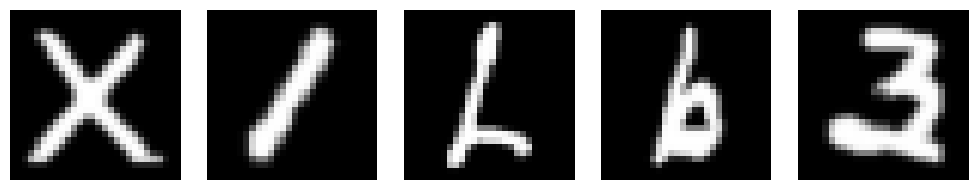

In [28]:
plot_random_samples_from_loader(val_loader_EMNIST, EMNIST=True)

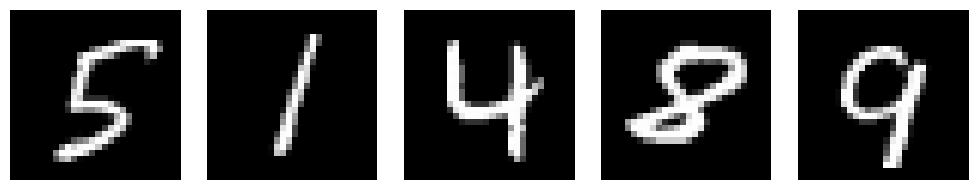

In [22]:
plot_random_samples_from_loader(val_loader_MNIST)

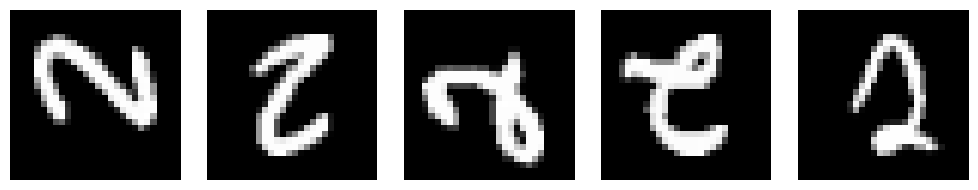

In [21]:
plot_random_samples_from_loader(val_loader_2MNIST)